# Clustering-K Means-Airlines data

In [74]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [38]:
#Load data
df = pd.read_excel(r'D:\Data science\Assignments\Clustering\EastWestAirlines.xlsx',sheet_name='data',index_col=0)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [39]:
#EDA

In [40]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [41]:
df.dtypes

Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [42]:
#Duplicates
df.duplicated().sum()

1

In [43]:
#Print the duplicated values
df[df.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [44]:
df[(df['Balance'] == 1000) & (df['Days_since_enroll'] ==1597)]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
3393,1000,0,1,1,1,0,0,0,0,1597,0
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [45]:
df.duplicated(keep='last')

ID#
1       False
2       False
3       False
4       False
5       False
        ...  
4017    False
4018    False
4019    False
4020    False
4021    False
Length: 3999, dtype: bool

In [46]:
df.drop_duplicates(inplace=True)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [47]:
df.shape

(3998, 11)

In [48]:
df.duplicated().sum()

0

In [49]:
#Outlier detection

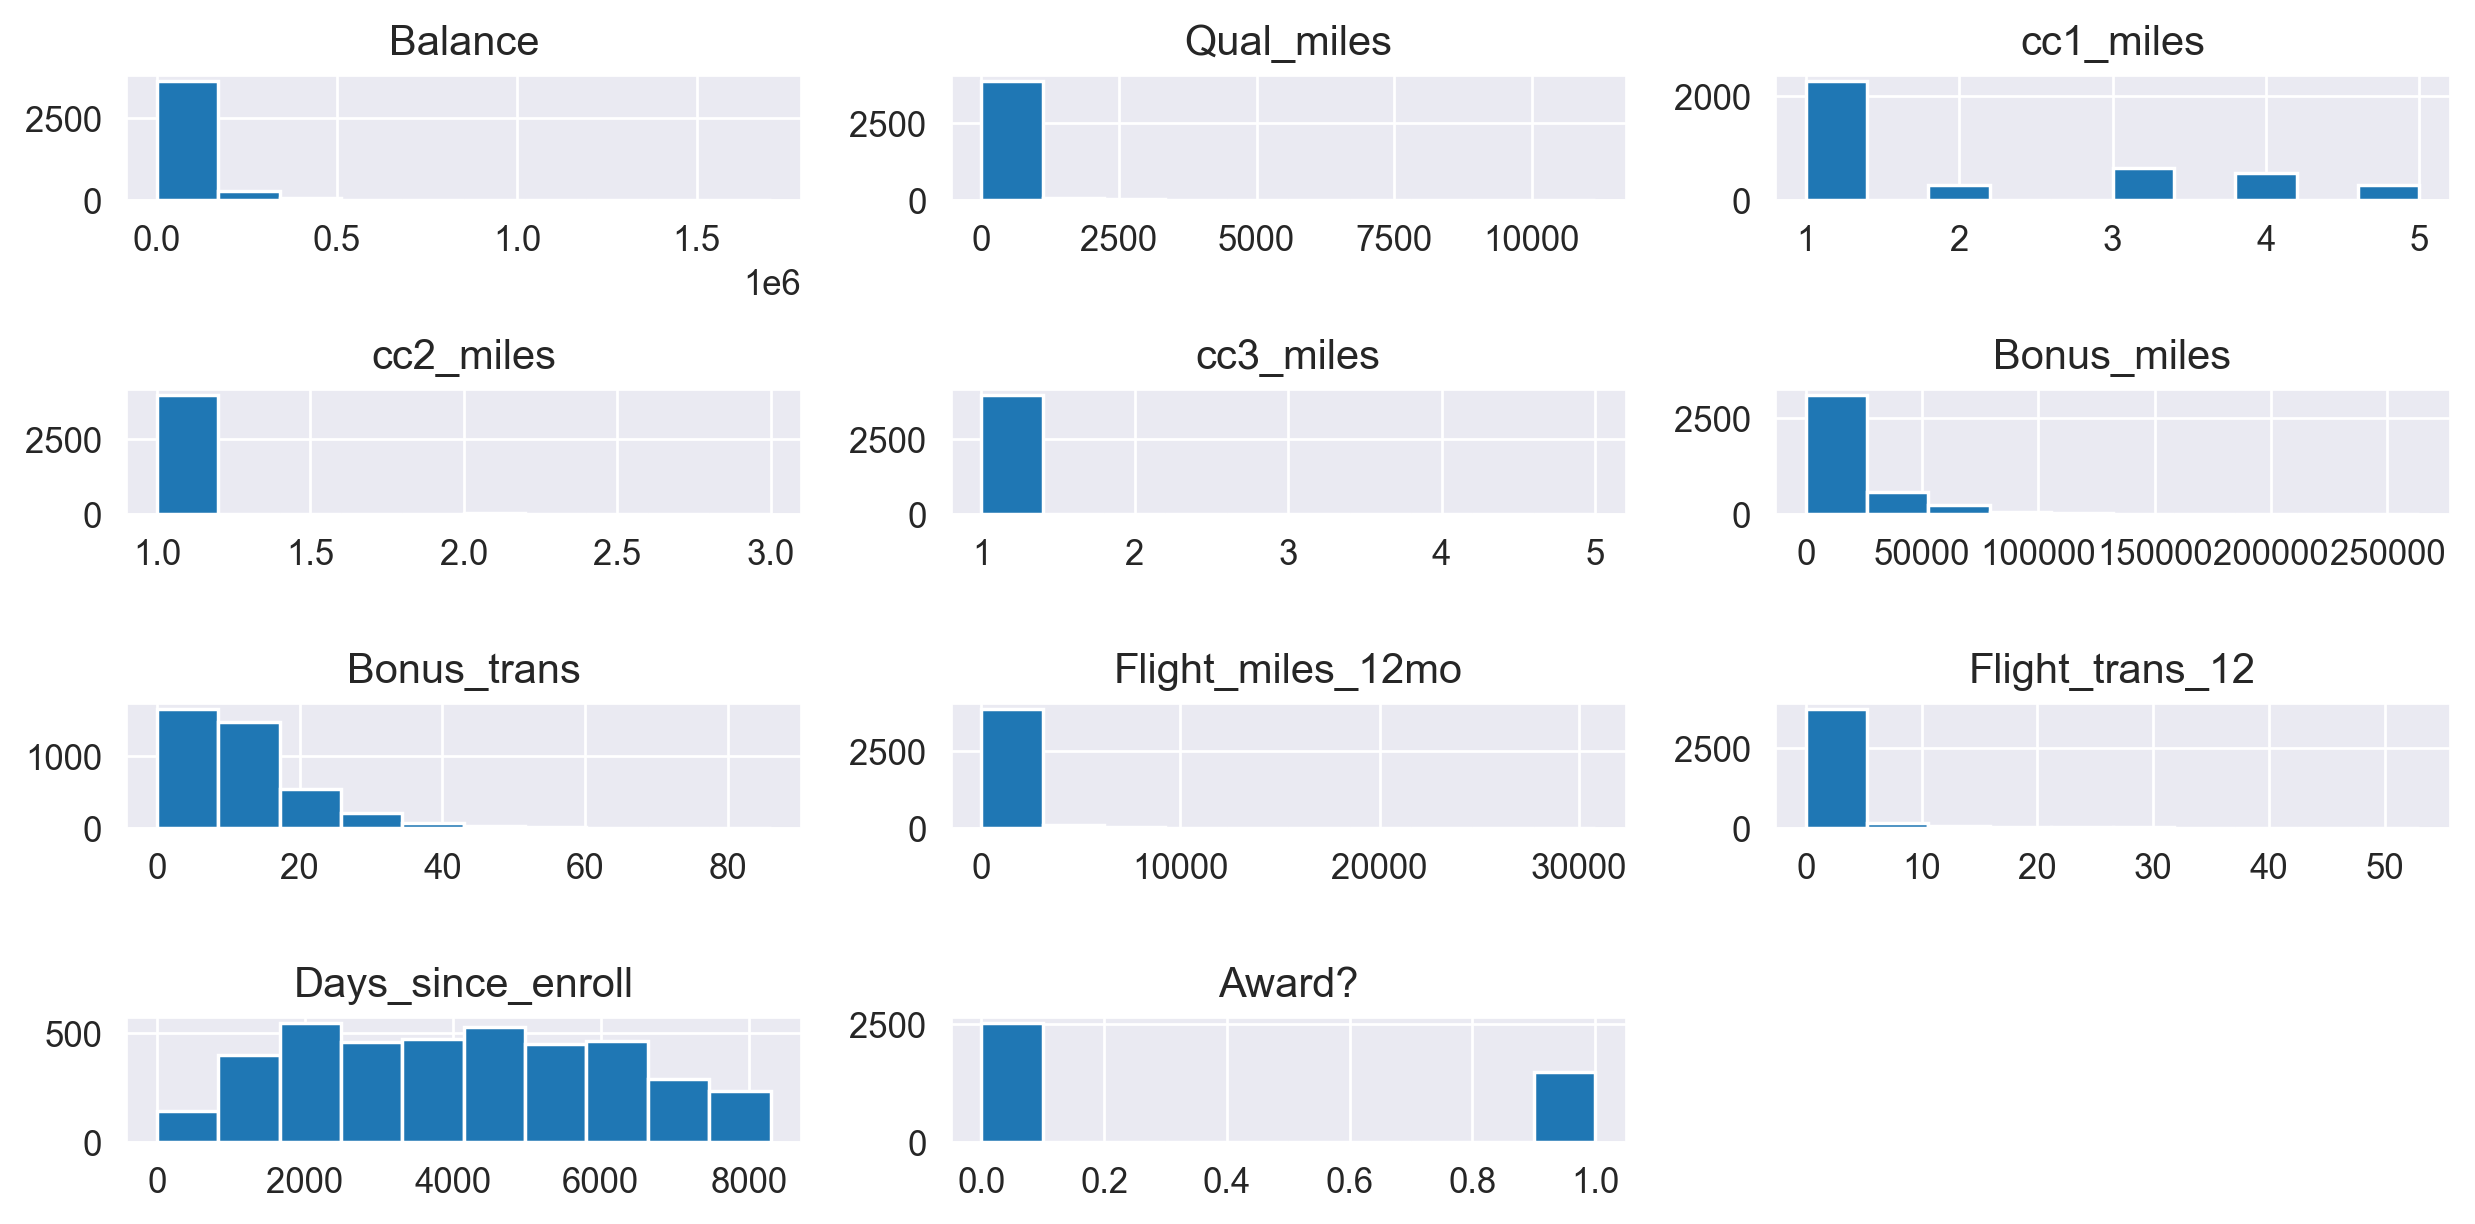

In [50]:
df.hist()
plt.tight_layout()

In [51]:
#from  scatter plot cc2_miles and cc3_miles have same value so we can drop those columns

<Axes: xlabel='Days_since_enroll'>

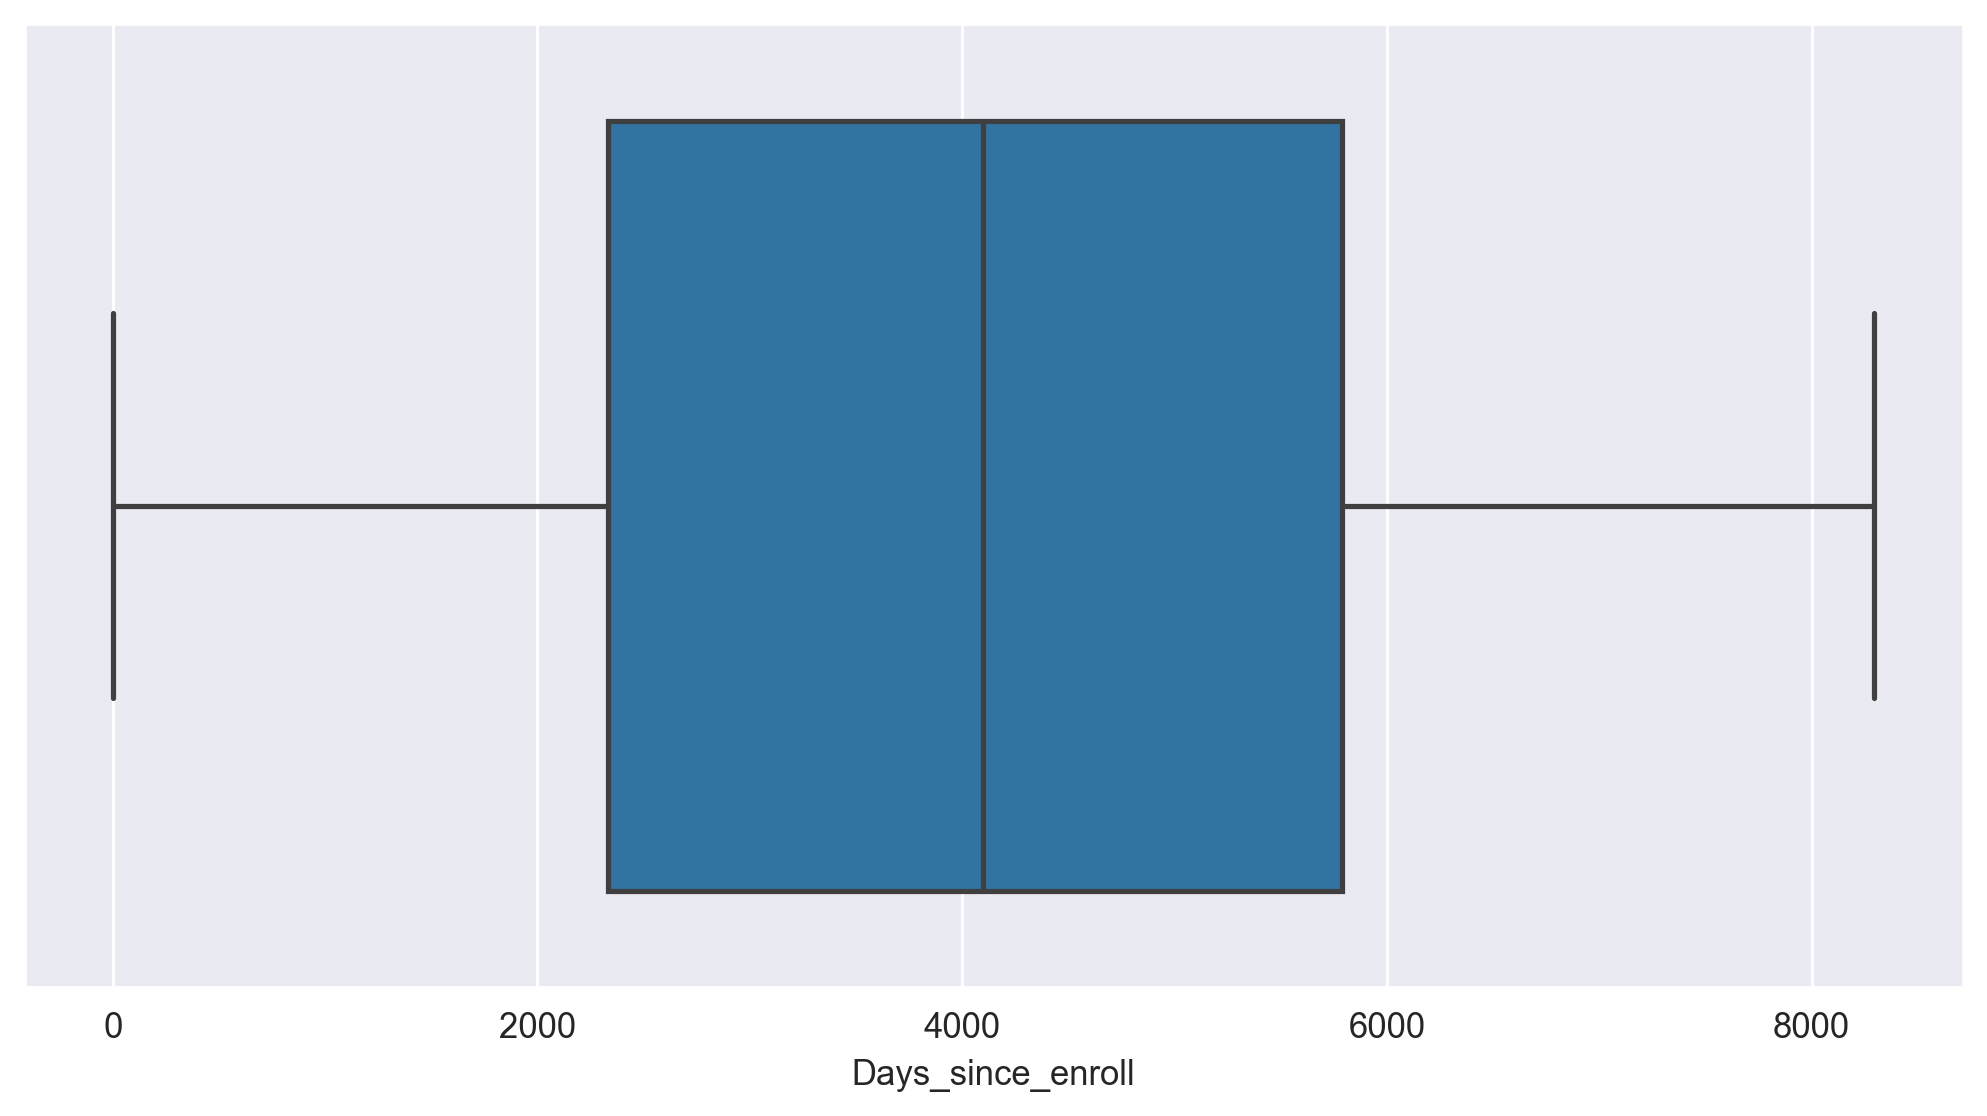

In [52]:
sns.boxplot(x=df['Days_since_enroll'])

In [53]:
#Rename the columns
df.rename(columns={'Award?':'Award'},inplace=True)
df.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0


In [54]:
#Missing values

In [55]:
columns_to_replace = ['Balance','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award']
df[columns_to_replace] = df[columns_to_replace].replace(0, np.nan)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID#,,,,,,,,,,,
1,28143.0,NaN,1,1,1,174.0,1.0,NaN,NaN,7000,NaN
2,19244.0,NaN,1,1,1,215.0,2.0,NaN,NaN,6968,NaN
3,41354.0,NaN,1,1,1,4123.0,4.0,NaN,NaN,7034,NaN
4,14776.0,NaN,1,1,1,500.0,1.0,NaN,NaN,6952,NaN
5,97752.0,NaN,4,1,1,43300.0,26.0,2077.0,4.0,6935,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476.0,NaN,1,1,1,8525.0,4.0,200.0,1.0,1403,1.0
4018,64385.0,NaN,1,1,1,981.0,5.0,NaN,NaN,1395,1.0
4019,73597.0,NaN,3,1,1,25447.0,8.0,NaN,NaN,1402,1.0


In [56]:
#Checking null values

In [57]:
#Calculate the percentage of missig values in each column.
x=df.isnull().sum()
x

Balance                 1
Qual_miles           3772
cc1_miles               0
cc2_miles               0
cc3_miles               0
Bonus_miles           474
Bonus_trans           474
Flight_miles_12mo    2722
Flight_trans_12      2722
Days_since_enroll       0
Award                2517
dtype: int64

In [58]:
def missing_percent (x):
    y =(x/len(df))*100
    return y

In [59]:
missing_percent(x) 

Balance               0.025013
Qual_miles           94.347174
cc1_miles             0.000000
cc2_miles             0.000000
cc3_miles             0.000000
Bonus_miles          11.855928
Bonus_trans          11.855928
Flight_miles_12mo    68.084042
Flight_trans_12      68.084042
Days_since_enroll     0.000000
Award                62.956478
dtype: float64

Rule for missing value imputation:

If NA values are between 1 to 5%, drop na (rows)

If NA value are 5 to 40%, fillna(replace)

If NA values are greater than 50% in a column, drop that entire column

As in our data below columns has missing value percent greater than 50% dropping those columns 

Qual_miles           94.347174

Flight_miles_12mo    68.084042

Flight_trans_12      68.084042

Award                62.956478


In [60]:
df.drop(columns=['Qual_miles','Flight_miles_12mo','Flight_trans_12','Award'],inplace=True)
df

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Days_since_enroll
ID#,,,,,,,
1,28143.0,1,1,1,174.0,1.0,7000
2,19244.0,1,1,1,215.0,2.0,6968
3,41354.0,1,1,1,4123.0,4.0,7034
4,14776.0,1,1,1,500.0,1.0,6952
5,97752.0,4,1,1,43300.0,26.0,6935
...,...,...,...,...,...,...,...
4017,18476.0,1,1,1,8525.0,4.0,1403
4018,64385.0,1,1,1,981.0,5.0,1395
4019,73597.0,3,1,1,25447.0,8.0,1402


In [61]:
df.drop(columns=['cc2_miles','cc3_miles'],inplace=True)  ## drop as same value 1 throughtout the column
df

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Days_since_enroll
ID#,,,,,
1,28143.0,1,174.0,1.0,7000
2,19244.0,1,215.0,2.0,6968
3,41354.0,1,4123.0,4.0,7034
4,14776.0,1,500.0,1.0,6952
5,97752.0,4,43300.0,26.0,6935
...,...,...,...,...,...
4017,18476.0,1,8525.0,4.0,1403
4018,64385.0,1,981.0,5.0,1395
4019,73597.0,3,25447.0,8.0,1402


In [62]:
# replacing the null values with mean() as no outlier present
#Bonus_miles
#Bonus_trans
#balance

In [63]:
df['Bonus_miles'].mean()

19455.800227014755

In [64]:
df['Bonus_miles'].fillna(df['Bonus_miles'].mean(),inplace=True)
df

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Days_since_enroll
ID#,,,,,
1,28143.0,1,174.000000,1.0,7000
2,19244.0,1,215.000000,2.0,6968
3,41354.0,1,4123.000000,4.0,7034
4,14776.0,1,500.000000,1.0,6952
5,97752.0,4,43300.000000,26.0,6935
...,...,...,...,...,...
4017,18476.0,1,8525.000000,4.0,1403
4018,64385.0,1,981.000000,5.0,1395
4019,73597.0,3,25447.000000,8.0,1402


In [65]:
df['Bonus_trans'].mean()

13.16572077185017

In [66]:
df['Bonus_trans'].fillna(df['Bonus_trans'].mean(),inplace=True)
df

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Days_since_enroll
ID#,,,,,
1,28143.0,1,174.000000,1.000000,7000
2,19244.0,1,215.000000,2.000000,6968
3,41354.0,1,4123.000000,4.000000,7034
4,14776.0,1,500.000000,1.000000,6952
5,97752.0,4,43300.000000,26.000000,6935
...,...,...,...,...,...
4017,18476.0,1,8525.000000,4.000000,1403
4018,64385.0,1,981.000000,5.000000,1395
4019,73597.0,3,25447.000000,8.000000,1402


In [67]:
df['Balance'].fillna(df['Balance'].mean(),inplace=True)
df

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Days_since_enroll
ID#,,,,,
1,28143.0,1,174.000000,1.000000,7000
2,19244.0,1,215.000000,2.000000,6968
3,41354.0,1,4123.000000,4.000000,7034
4,14776.0,1,500.000000,1.000000,6952
5,97752.0,4,43300.000000,26.000000,6935
...,...,...,...,...,...
4017,18476.0,1,8525.000000,4.000000,1403
4018,64385.0,1,981.000000,5.000000,1395
4019,73597.0,3,25447.000000,8.000000,1402


# Model Building

In [68]:
#standardization
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[-4.51506798e-01, -7.69731660e-01, -8.26975269e-01,
        -1.41342147e+00,  1.39523468e+00],
       [-5.39823478e-01, -7.69731660e-01, -8.25216824e-01,
        -1.29724081e+00,  1.37973643e+00],
       [-3.20396376e-01, -7.69731660e-01, -6.57606989e-01,
        -1.06487949e+00,  1.41170157e+00],
       ...,
       [-4.05961766e-04,  6.82893866e-01,  2.56955989e-01,
        -6.00156848e-01, -1.31599028e+00],
       [-1.85971224e-01, -7.69731660e-01, -8.12993486e-01,
        -1.41342147e+00, -1.31647460e+00],
       [-7.00875626e-01, -7.69731660e-01,  0.00000000e+00,
        -2.06378310e-16, -1.31792757e+00]])

In [ ]:
#Dendrogram with single and complete linkage

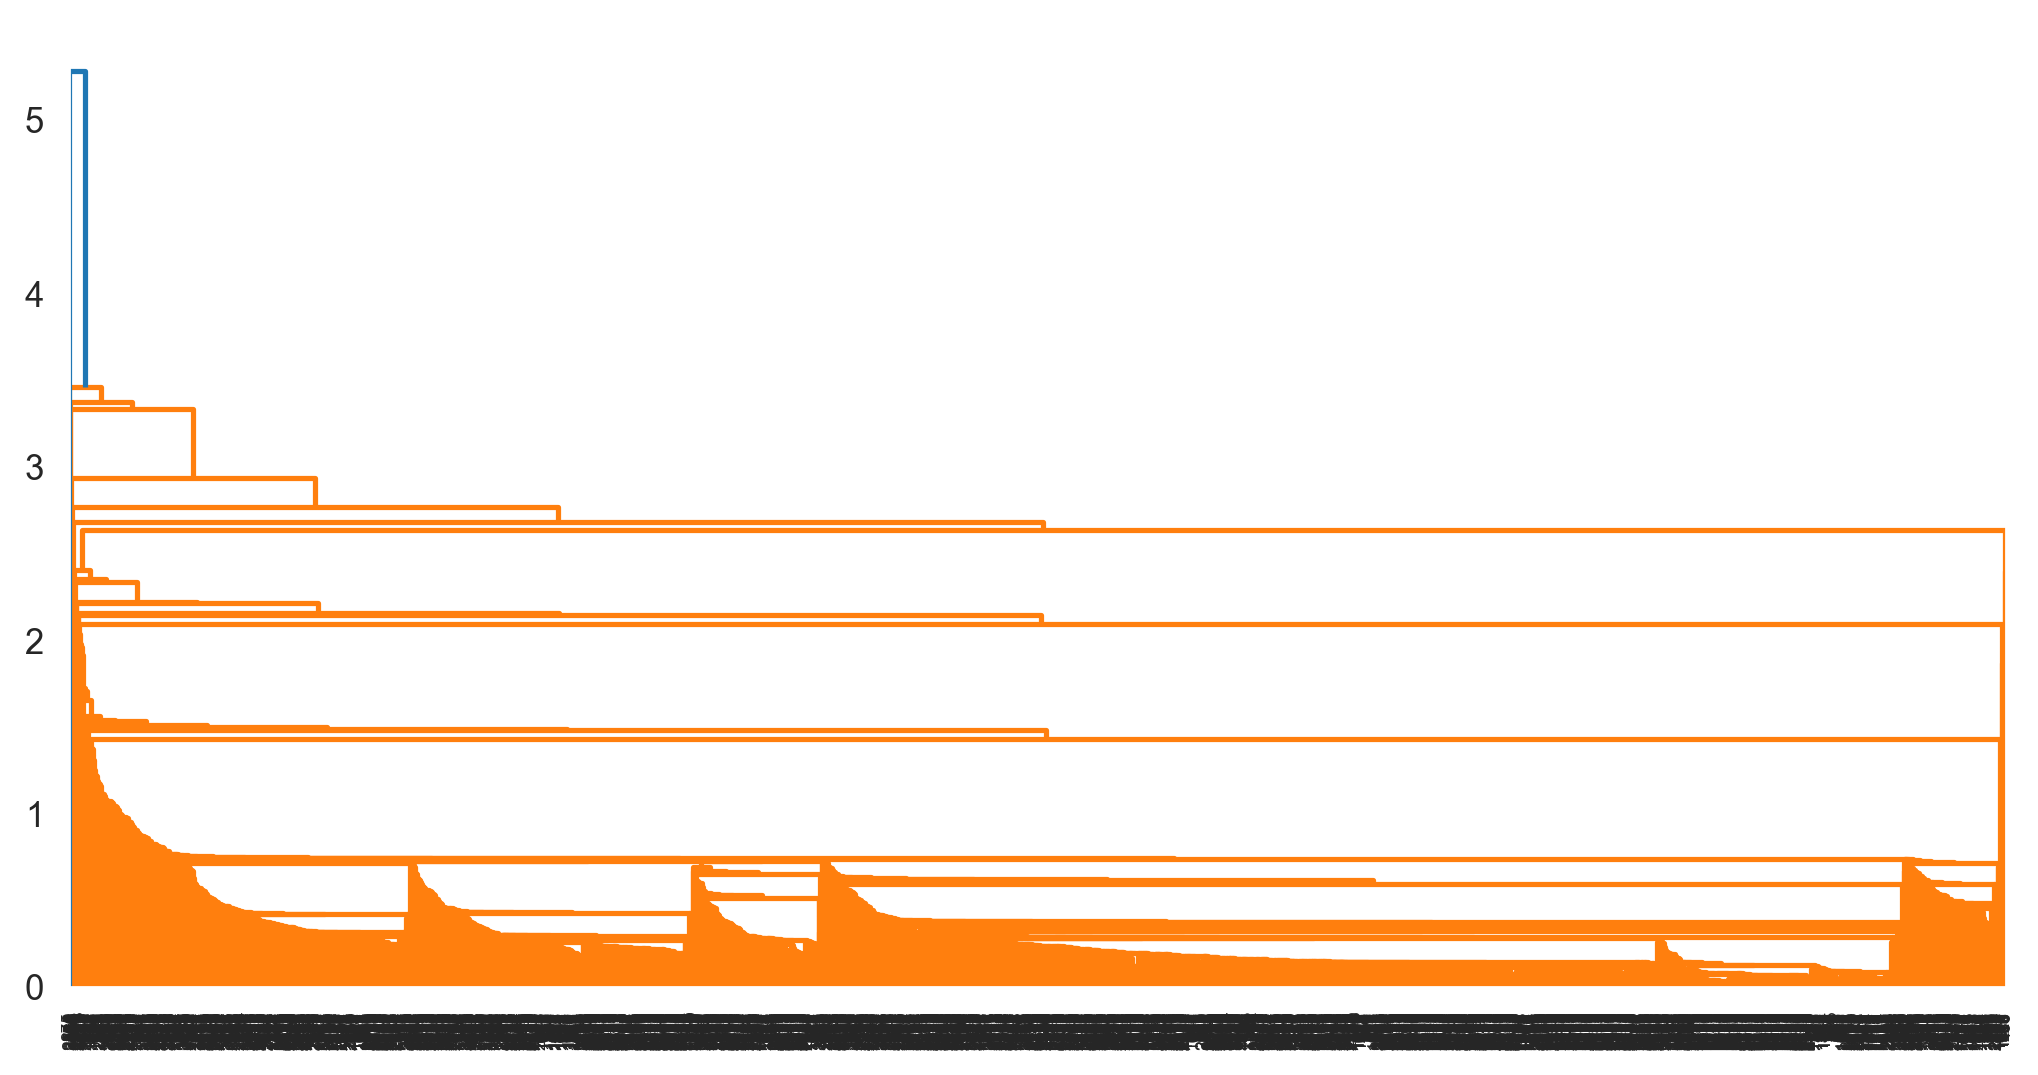

In [70]:
lk = hierarchy.linkage(x, method='single')  ##sta.data stored in x variable
dendrogram = hierarchy.dendrogram(lk)

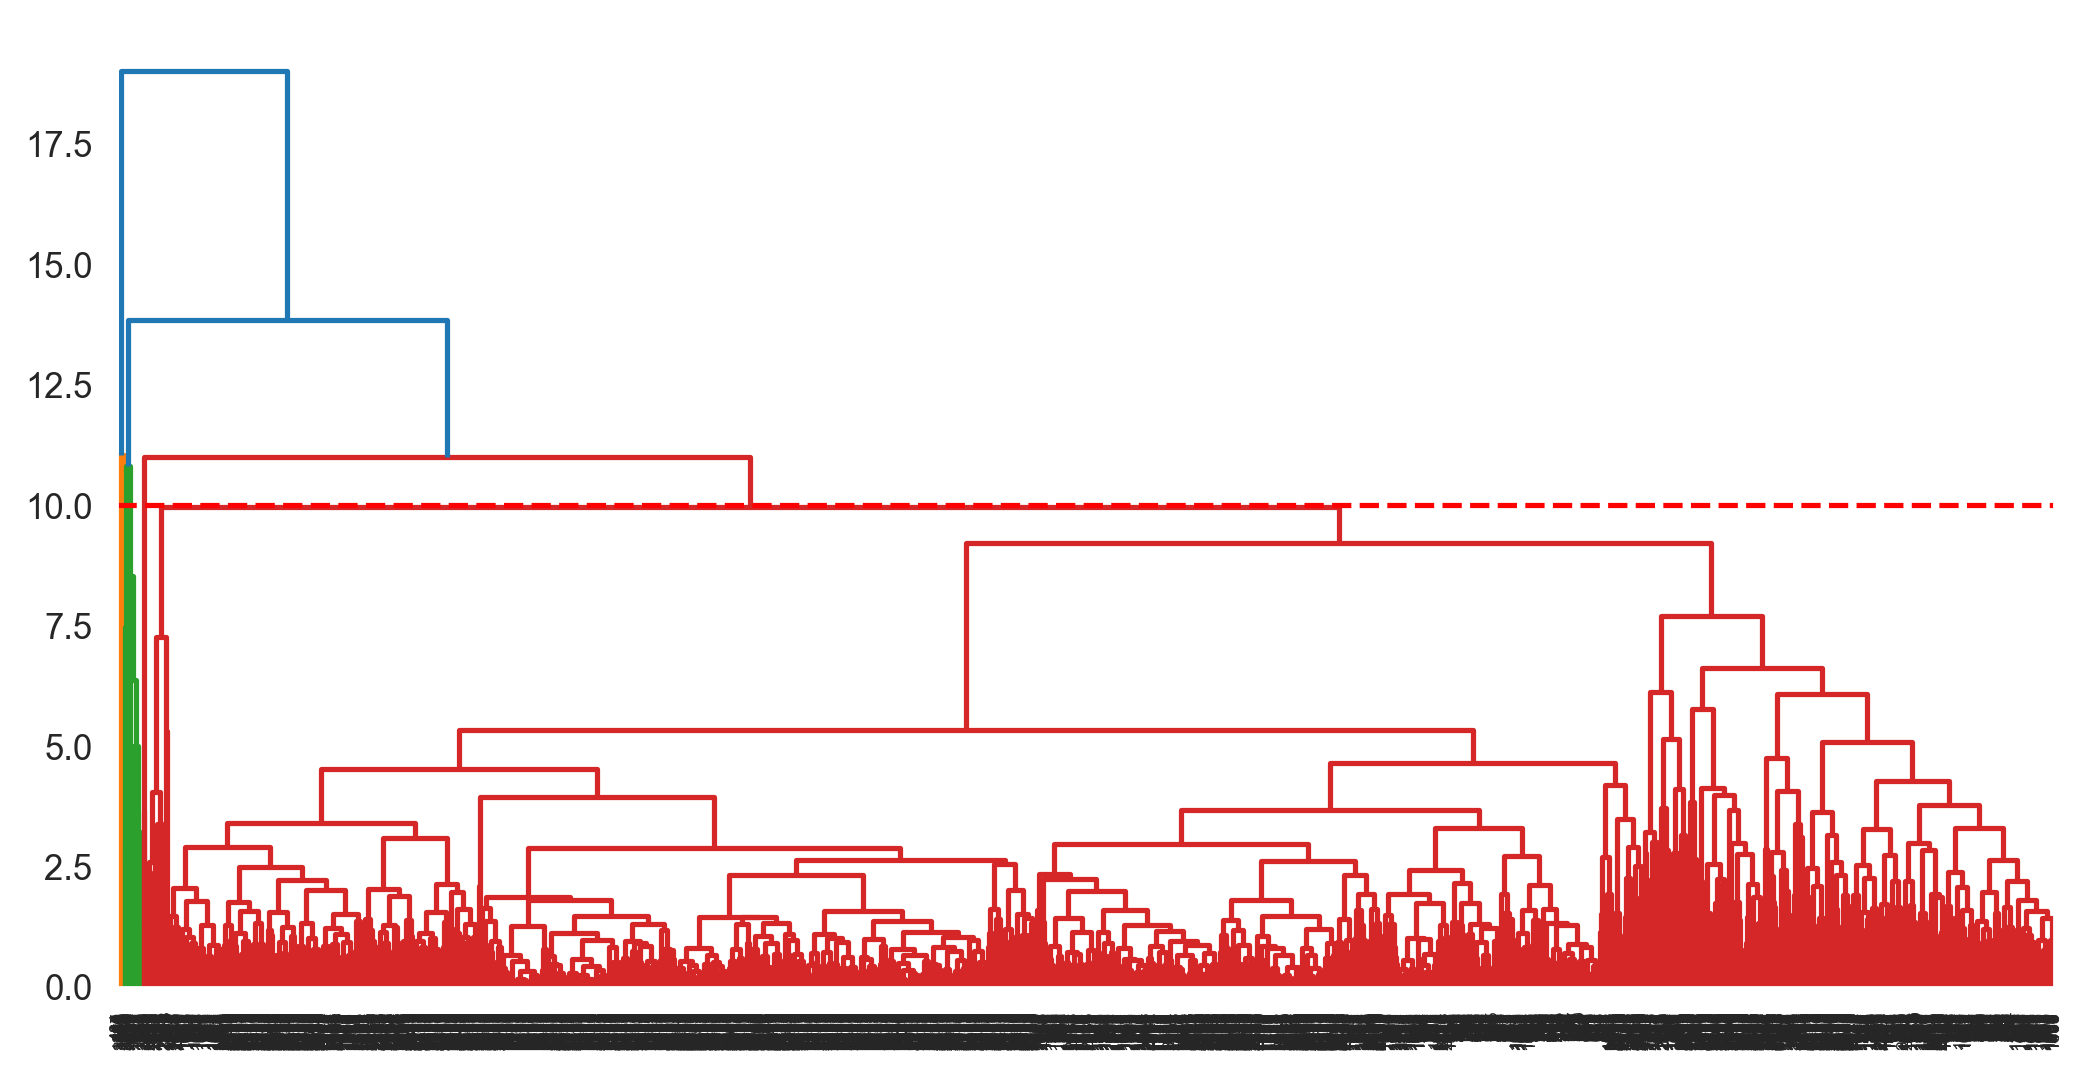

In [73]:
lk = hierarchy.linkage(x, method='complete')  ##sta.data stored in x variable
dendrogram = hierarchy.dendrogram(lk)
plt.axhline(y = 10, linestyle = '--', color = 'red')

In [75]:
hc = AgglomerativeClustering(n_clusters=5)

ypred = hc.fit_predict(x)
ypred

array([1, 1, 1, ..., 0, 3, 3], dtype=int64)

In [77]:
df['Cluster'] = ypred
df

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Days_since_enroll,Cluster
ID#,,,,,,
1,28143.0,1,174.000000,1.000000,7000,1
2,19244.0,1,215.000000,2.000000,6968,1
3,41354.0,1,4123.000000,4.000000,7034,1
4,14776.0,1,500.000000,1.000000,6952,1
5,97752.0,4,43300.000000,26.000000,6935,0
...,...,...,...,...,...,...
4017,18476.0,1,8525.000000,4.000000,1403,3
4018,64385.0,1,981.000000,5.000000,1395,3
4019,73597.0,3,25447.000000,8.000000,1402,0


In [78]:
df.groupby('Cluster').agg('mean')

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Days_since_enroll
Cluster,,,,,
0,77635.612981,3.215545,27270.420673,18.133814,4416.023237
1,59010.058562,1.071315,7214.786407,8.498923,5316.125198
2,184410.843260,4.673981,74449.705329,25.351097,5519.244514
3,33584.999113,1.118012,8574.156931,9.140116,1969.074534
4,627787.023810,2.833333,29362.214286,21.238095,6394.976190
